In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from pandas.plotting import table 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
oecddata = pd.read_csv("OECD STAT CSV.csv")
oecddata.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [4]:
oecddata.count()

LOCATION                 2368
Country                  2368
INDICATOR                2368
Indicator                2368
MEASURE                  2368
Measure                  2368
INEQUALITY               2368
Inequality               2368
Unit Code                2368
Unit                     2368
PowerCode Code           2368
PowerCode                2368
Reference Period Code       0
Reference Period            0
Value                    2368
Flag Codes                  0
Flags                       0
dtype: int64

In [5]:
oecddata.dtypes

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object

In [6]:
oecddata["Indicator"].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [7]:
leisuretime = oecddata.loc[oecddata["Indicator"] == "Time devoted to leisure and personal care"]
leisuretime = leisuretime.loc[leisuretime["Inequality"] == "Total"]
leisuretime = leisuretime[["Country", "Indicator", "Value"]]
leisuretime

,Country,Indicator,Value
2200,Australia,Time devoted to leisure and personal care,14.35
2201,Austria,Time devoted to leisure and personal care,14.55
2202,Belgium,Time devoted to leisure and personal care,15.70
2203,Canada,Time devoted to leisure and personal care,14.56
2204,Denmark,Time devoted to leisure and personal care,15.87
2205,Finland,Time devoted to leisure and personal care,15.17
2206,France,Time devoted to leisure and personal care,16.36
2207,Germany,Time devoted to leisure and personal care,15.62
2208,Italy,Time devoted to leisure and personal care,16.47
2209,Korea,Time devoted to leisure and personal care,14.70


In [8]:
outputfile = leisuretime.to_csv("oecdleisuretime.csv", encoding="utf-8", index=False)

In [9]:
oecdleisuretime = pd.read_csv("oecdleisuretime.csv")
happiness = pd.read_csv("Happiness2019.csv")

In [10]:
oecdleisuretime.head()

,Country,Indicator,Value
0,Australia,Time devoted to leisure and personal care,14.35
1,Austria,Time devoted to leisure and personal care,14.55
2,Belgium,Time devoted to leisure and personal care,15.70
3,Canada,Time devoted to leisure and personal care,14.56
4,Denmark,Time devoted to leisure and personal care,15.87


In [11]:
happiness.head()

,Country,Ladder
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5


In [12]:
mergeoecd = pd.merge(happiness, oecdleisuretime, on="Country", how="left")
mergedoecd = mergeoecd.dropna(how="any")
mergedoecd.reset_index()

,index,Country,Ladder,Indicator,Value
0,0,Finland,1,Time devoted to leisure and personal care,15.17
1,1,Denmark,2,Time devoted to leisure and personal care,15.87
2,2,Norway,3,Time devoted to leisure and personal care,15.56
3,6,Sweden,7,Time devoted to leisure and personal care,15.18
4,7,New Zealand,8,Time devoted to leisure and personal care,14.87
5,8,Canada,9,Time devoted to leisure and personal care,14.56
6,9,Austria,10,Time devoted to leisure and personal care,14.55
7,10,Australia,11,Time devoted to leisure and personal care,14.35
8,14,United Kingdom,15,Time devoted to leisure and personal care,14.92
9,16,Germany,17,Time devoted to leisure and personal care,15.62


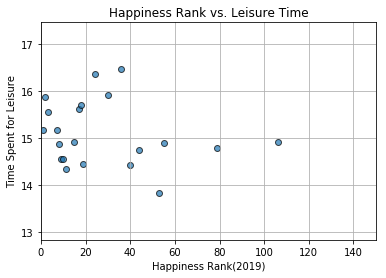

In [13]:
# Build a scatter plot and save figure

plt.scatter(mergedoecd["Ladder"], mergedoecd["Value"], edgecolor="black", alpha=0.7)
plt.xlim(0,150)
plt.ylim(min(mergedoecd["Value"])-1, max(mergedoecd["Value"]+1))
plt.grid()

plt.title(f"Happiness Rank vs. Leisure Time")
plt.xlabel("Happiness Rank(2019)")
plt.ylabel("Time Spent for Leisure")

plt.savefig("happpinessvsleisuretime")
plt.show()


In [14]:
leisurecorr = np.corrcoef(mergedoecd["Ladder"], mergedoecd["Value"])
leisurecorr

array([[ 1.        , -0.19614369],
       [-0.19614369,  1.        ]])

In [24]:
supportnw = oecddata.loc[oecddata["Indicator"] == "Quality of support network"]
supportnw = supportnw.loc[supportnw["Inequality"] == "Total"]
supportnw = supportnw[["Country", "Indicator", "Value"]]
supportnw.head()


,Country,Indicator,Value
745,Australia,Quality of support network,95.0
746,Austria,Quality of support network,92.0
747,Belgium,Quality of support network,91.0
748,Canada,Quality of support network,93.0
749,Czech Republic,Quality of support network,91.0


In [25]:
outputfile = supportnw.to_csv("oecdsupportnw.csv", encoding="utf-8", index=False)

In [26]:
oecdsupportnw = pd.read_csv("oecdsupportnw.csv")
happiness = pd.read_csv("Happiness2019.csv")

mergedoecd1 = pd.merge(happiness, oecdsupportnw, on="Country", how="left")
mergedoecd1 = mergedoecd1.dropna(how="any")
mergedoecd1.reset_index()


,index,Country,Ladder,Indicator,Value
0,0,Finland,1,Quality of support network,95.0
1,1,Denmark,2,Quality of support network,95.0
2,2,Norway,3,Quality of support network,94.0
3,3,Iceland,4,Quality of support network,98.0
4,4,Netherlands,5,Quality of support network,91.0
5,5,Switzerland,6,Quality of support network,93.0
6,6,Sweden,7,Quality of support network,91.0
7,7,New Zealand,8,Quality of support network,96.0
8,8,Canada,9,Quality of support network,93.0
9,9,Austria,10,Quality of support network,92.0


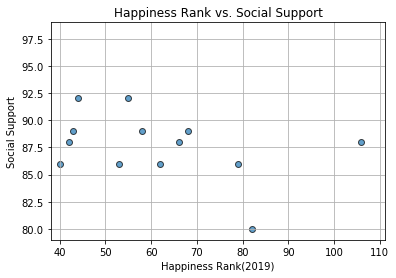

In [38]:
# Build a scatter plot and save figure

plt.scatter(mergedoecd1["Ladder"], mergedoecd1["Value"], edgecolor="black", alpha=0.7)
plt.xlim(len(mergedoecd1))
plt.ylim(min(mergedoecd1["Value"])-1, max(mergedoecd1["Value"]+1))
plt.grid()

plt.title(f"Happiness Rank vs. Social Support")
plt.xlabel("Happiness Rank(2019)")
plt.ylabel("Social Support")

plt.savefig("happpinessvssocialsupport")
plt.show()


In [39]:
socialcorr1 = np.corrcoef(mergedoecd1["Ladder"], mergedoecd1["Value"])
socialcorr1

array([[ 1.        , -0.62373397],
       [-0.62373397,  1.        ]])

In [40]:
lifeexpectancy = oecddata.loc[oecddata["Indicator"] == "Life expectancy"]
lifeexpectancy = lifeexpectancy.loc[lifeexpectancy["Inequality"] == "Total"]
lifeexpectancy = lifeexpectancy[["Country", "Indicator", "Value"]]
lifeexpectancy.head()


,Country,Indicator,Value
1518,Australia,Life expectancy,82.5
1519,Austria,Life expectancy,81.7
1520,Belgium,Life expectancy,81.5
1521,Canada,Life expectancy,81.9
1522,Czech Republic,Life expectancy,79.1


In [41]:
outputfile = lifeexpectancy.to_csv("oecdlifeexpectancy.csv", encoding="utf-8", index=False)

In [42]:
oecdlifeexpectancy = pd.read_csv("oecdlifeexpectancy.csv")
happiness = pd.read_csv("Happiness2019.csv")

mergedoecd2 = pd.merge(happiness, oecdlifeexpectancy, on="Country", how="left")
mergedoecd2 = mergedoecd2.dropna(how="any")
mergedoecd2.reset_index()


,index,Country,Ladder,Indicator,Value
0,0,Finland,1,Life expectancy,81.5
1,1,Denmark,2,Life expectancy,80.9
2,2,Norway,3,Life expectancy,82.5
3,3,Iceland,4,Life expectancy,82.3
4,4,Netherlands,5,Life expectancy,81.6
5,5,Switzerland,6,Life expectancy,83.7
6,6,Sweden,7,Life expectancy,82.4
7,7,New Zealand,8,Life expectancy,81.7
8,8,Canada,9,Life expectancy,81.9
9,9,Austria,10,Life expectancy,81.7


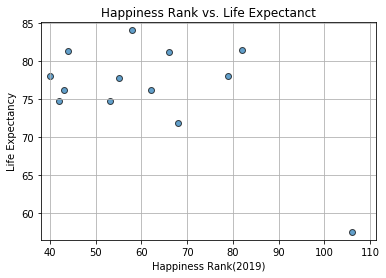

In [43]:
# Build a scatter plot and save figure

plt.scatter(mergedoecd2["Ladder"], mergedoecd2["Value"], edgecolor="black", alpha=0.7)
plt.xlim(len(mergedoecd2))
plt.ylim(min(mergedoecd2["Value"])-1, max(mergedoecd2["Value"]+1))
plt.grid()

plt.title(f"Happiness Rank vs. Life Expectanct")
plt.xlabel("Happiness Rank(2019)")
plt.ylabel("Life Expectancy")

plt.savefig("happpinessvslifeexpectancy")
plt.show()


In [44]:
lifecorr1 = np.corrcoef(mergedoecd2["Ladder"], mergedoecd2["Value"])
lifecorr1

array([[ 1.        , -0.63720656],
       [-0.63720656,  1.        ]])